codes from http://scikit.ml/labelrelations.html

In [1]:
from skmultilearn.dataset import load_dataset
X_train, y_train, feature_names, label_names = load_dataset('yeast', 'train')
X_test, y_test, _, _ = load_dataset('yeast', 'test')

yeast:train - exists, not redownloading
yeast:test - exists, not redownloading


In [2]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder

In [3]:
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)

In [4]:
edge_map = graph_builder.transform(y_train)
print("{} labels, {} edges".format(len(label_names), len(edge_map)))
print(edge_map)

14 labels, 86 edges
{(2, 3): 365.0, (6, 7): 223.0, (6, 11): 220.0, (7, 11): 225.0, (6, 12): 212.0, (7, 12): 224.0, (11, 12): 1116.0, (1, 2): 336.0, (1, 11): 449.0, (2, 11): 465.0, (1, 12): 447.0, (2, 12): 463.0, (3, 11): 462.0, (3, 12): 461.0, (2, 13): 21.0, (3, 13): 21.0, (11, 13): 16.0, (12, 13): 16.0, (0, 1): 380.0, (1, 4): 93.0, (2, 4): 72.0, (1, 5): 130.0, (2, 5): 60.0, (4, 5): 266.0, (4, 11): 367.0, (5, 11): 297.0, (4, 12): 367.0, (5, 12): 289.0, (3, 4): 206.0, (1, 6): 78.0, (2, 6): 37.0, (4, 6): 59.0, (5, 6): 171.0, (1, 7): 102.0, (2, 7): 63.0, (4, 7): 70.0, (5, 7): 146.0, (7, 8): 84.0, (3, 5): 31.0, (4, 13): 3.0, (5, 13): 1.0, (9, 10): 144.0, (0, 11): 315.0, (0, 12): 314.0, (0, 9): 26.0, (1, 9): 79.0, (0, 10): 36.0, (1, 10): 80.0, (0, 4): 58.0, (0, 5): 115.0, (0, 2): 84.0, (0, 6): 72.0, (0, 7): 81.0, (2, 9): 74.0, (6, 9): 17.0, (7, 9): 20.0, (2, 10): 69.0, (6, 10): 53.0, (7, 10): 42.0, (9, 11): 116.0, (10, 11): 159.0, (9, 12): 114.0, (10, 12): 147.0, (0, 8): 32.0, (1, 8): 52.0,

In [5]:
from skmultilearn.cluster import NetworkXLabelGraphClusterer

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }


In [6]:
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')


In [7]:
partition = clusterer.fit_predict(X_train,y_train)
partition

/Users/cooky/miniforge3/lib/python3.9/site-packages/skmultilearn/cluster/networkx.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(


array([list([0, 1]), list([9, 10]), list([2, 3, 4, 11, 12, 13]),
       list([5, 6, 7, 8])], dtype=object)

In [8]:
membership_vector = to_membership_vector(partition)


In [9]:
import networkx as nx
names_dict = dict(enumerate(x[0].replace('-','-\n') for x in label_names))

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

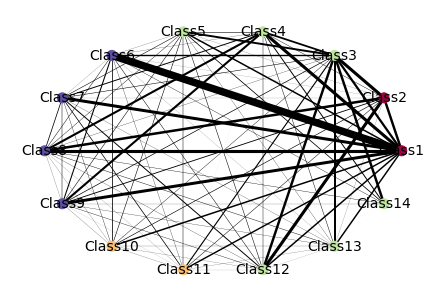

In [11]:
nx.draw(
    clusterer.graph_,
    pos=nx.circular_layout(clusterer.graph_),
    labels=names_dict,
    with_labels = True,
    width = [10*x/y_train.shape[0] for x in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y_train.shape[1])],
    cmap=plt.cm.Spectral,
    node_size=100,
    font_size=14
)

----